In [1]:
import numpy as np
import pandas as pd
from pandas import *
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
from scipy import stats
sns.set_style("darkgrid")
import matplotlib.image as mpimg
from IPython.display import IFrame
import folium
from folium import plugins
from folium.plugins import MarkerCluster, FastMarkerCluster, HeatMapWithTime

/anaconda3/envs/TEST/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


In [2]:
df=pd.read_csv("/Users/nathanmitch/Desktop/sundress/team_sundress/holdingout.csv")

Text(0.5,1,'Crime Dot Plot')

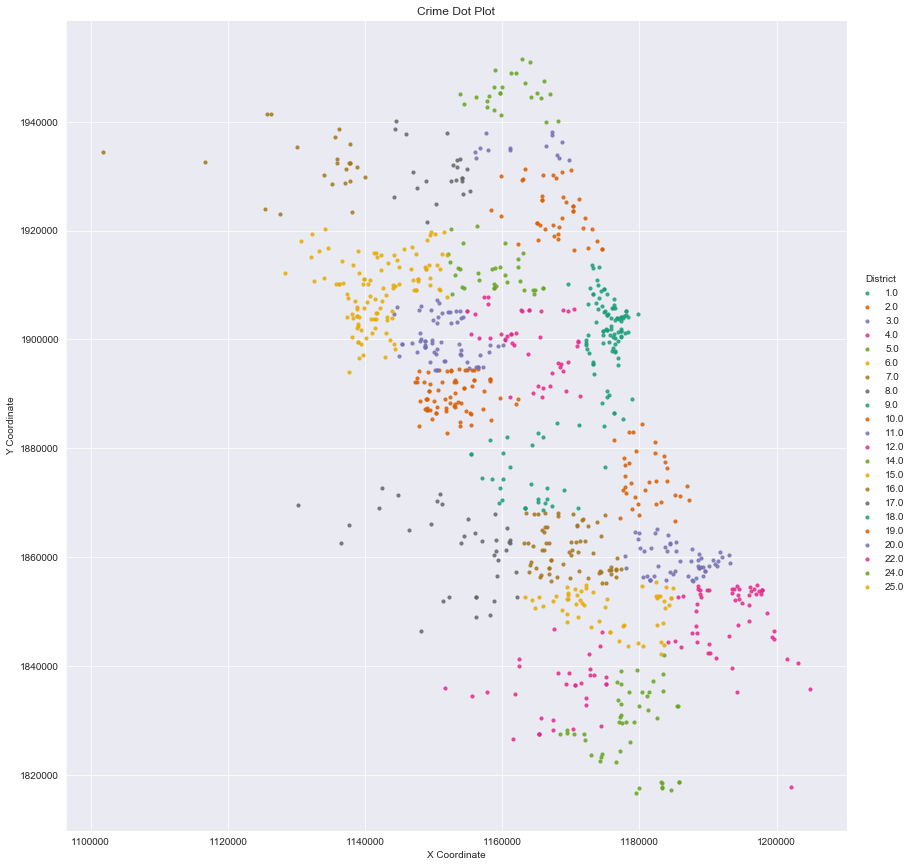

In [3]:
df = df.loc[(df['X Coordinate']!=0)]

sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=df[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crime Dot Plot")

In [4]:
df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x,"%m/%d/%Y %I:%M:%S %p"))
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
0,11663630,JC234612,2019-04-22 23:35:00,041XX W 25TH ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,...,-87.727011,"(41.846047463, -87.727011485)",14.0,21569.0,32.0,194.0,28.0,57.0,21.0,161.0
1,11663656,JC234605,2019-04-22 23:32:00,006XX N LARAMIE AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,-87.755490,"(41.891905336, -87.755490053)",11.0,22216.0,26.0,673.0,45.0,32.0,25.0,67.0
2,11663650,JC234610,2019-04-22 23:30:00,091XX S GREENWOOD AVE,0460,BATTERY,SIMPLE,PARK PROPERTY,False,False,...,-87.597361,"(41.728594642, -87.597361383)",9.0,21546.0,43.0,472.0,35.0,61.0,19.0,246.0
3,11663815,JC234809,2019-04-22 23:30:00,067XX N MOZART ST,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,-87.701012,"(42.003851203, -87.701012017)",42.0,22528.0,20.0,40.0,27.0,12.0,11.0,46.0
4,11663693,JC234650,2019-04-22 23:30:00,047XX S COTTAGE GROVE AVE,0610,BURGLARY,FORCIBLE ENTRY,DEPARTMENT STORE,False,False,...,-87.606558,"(41.809305232, -87.606558389)",1.0,21192.0,5.0,461.0,10.0,10.0,24.0,116.0


In [5]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.dayofweek
df['HourOfDay'] = df['Date'].dt.hour
df = df.sort_values('Date')

Text(0.5,1,'Crime Over Time')

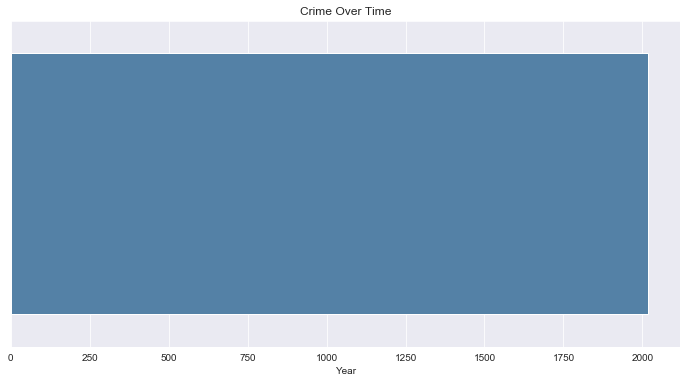

In [6]:
plt.figure(figsize=(12,6))
sns.barplot(x='Year',
#            y='HOMICIDE',
            data=df.groupby(['Year'])['Primary Type'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("Crime Over Time")

Text(0.5,1,'Monthly Crime')

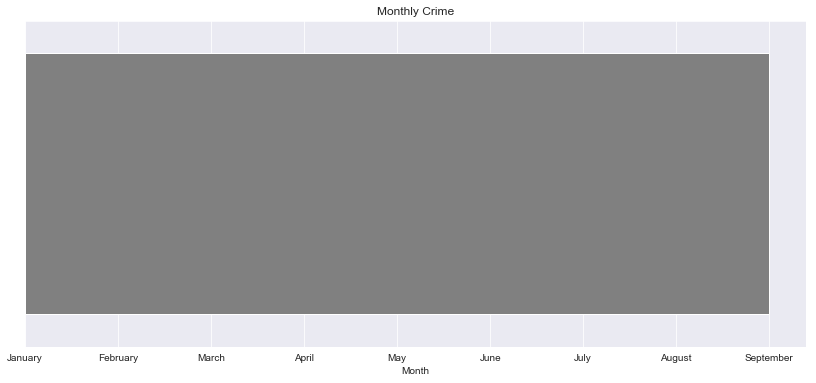

In [7]:
fig, ax = plt.subplots(figsize=(14,6))
month_nms = ['January','February','March','April','May','June','July','August'\
             ,'September','October','November','December']    
fig = sns.barplot(x='Month',
#                  y='HOMICIDE',
                  data=df.groupby(['Year','Month'])['Primary Type'].\
                  value_counts().unstack().reset_index(),
                  color='#808080')
ax.set_xticklabels(month_nms)
plt.title("Monthly Crime")

Text(0.5,1,'Crime by Day of Week')

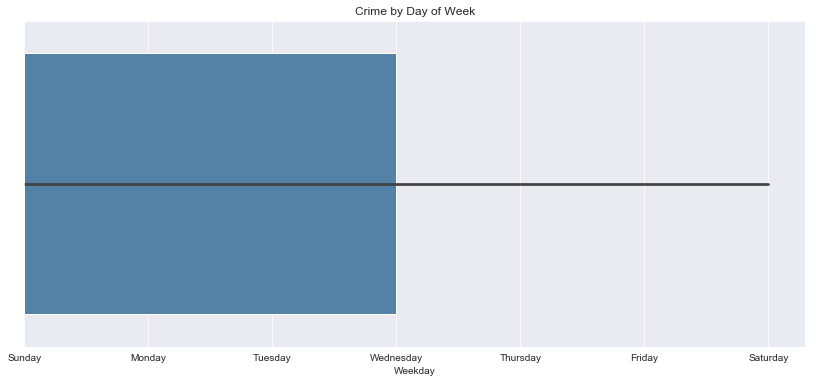

In [8]:
fig, ax = plt.subplots(figsize=(14,6))
week_days = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']    
fig = sns.barplot(x='Weekday',
#                  y='HOMICIDE',
                  data=df.groupby(['Year','Weekday'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue')
ax.set_xticklabels(week_days)
plt.title('Crime by Day of Week')

Text(0.5,1,'Crime by Time of Day')

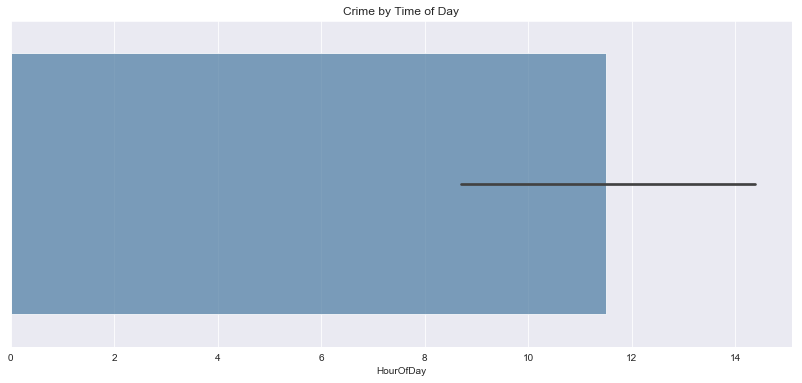

In [9]:
fig, ax = plt.subplots(figsize=(14,6))
fig = sns.barplot(x='HourOfDay',
#                  y='HOMICIDE',
                  data=df.groupby(['Year','HourOfDay'])['Primary Type'].\
                       value_counts().unstack().reset_index(),
                  color='steelblue',
                  alpha=.75)
plt.title('Crime by Time of Day')

In [10]:
crime_scene = df['Primary Type'].\
            groupby(df['Location Description']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_scene.head(10)

Primary Type,Location Description,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,NARCOTICS,OBSCENITY,OFFENSE INVOLVING CHILDREN,OTHER OFFENSE,PUBLIC PEACE VIOLATION,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
0,HOUSE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,STREET,NaN,18.0,35.0,1.0,1.0,1.0,50.0,5.0,4.0,...,20.0,NaN,NaN,20.0,2.0,7.0,NaN,NaN,36.0,11.0
2,ABANDONED BUILDING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5,ALLEY,NaN,2.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0,6.0
6,APARTMENT,NaN,19.0,48.0,11.0,NaN,NaN,17.0,3.0,6.0,...,NaN,NaN,2.0,7.0,NaN,1.0,2.0,1.0,12.0,1.0
7,ATHLETIC CLUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
8,AUTO / BOAT / RV DEALERSHIP,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BANK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


Text(0.5,1,'CRIME SCENE BY LOCATION FREQUENCY')

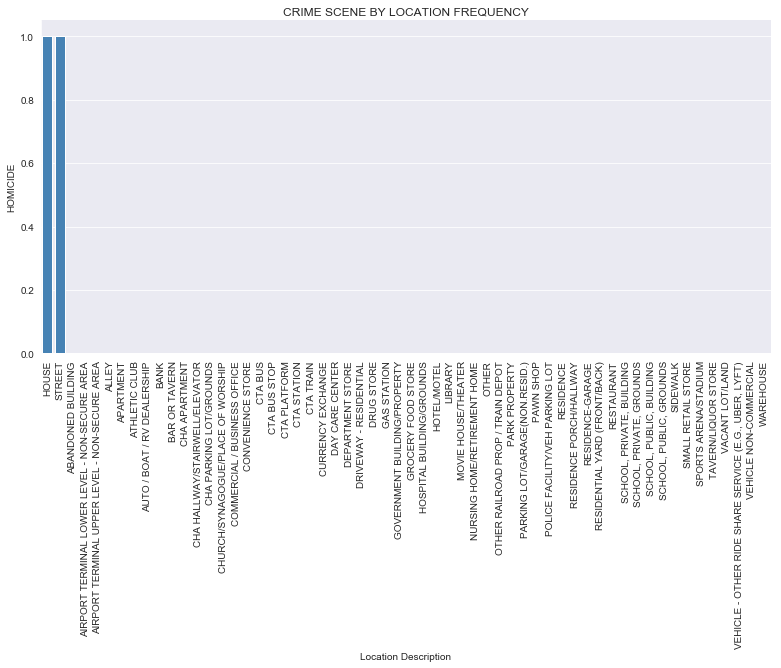

In [11]:
g = sns.catplot(x='Location Description',
                   y='HOMICIDE',
                   data=crime_scene,
                   kind='bar',
                   height=10,
                   color='steelblue', 
                   saturation=10)
g.fig.set_size_inches(15,5)
g.set_xticklabels(rotation=90)
plt.title('CRIME SCENE BY LOCATION FREQUENCY')

Text(0.5,1,'HOMICIDE vs DISTRICT vs YEAR')

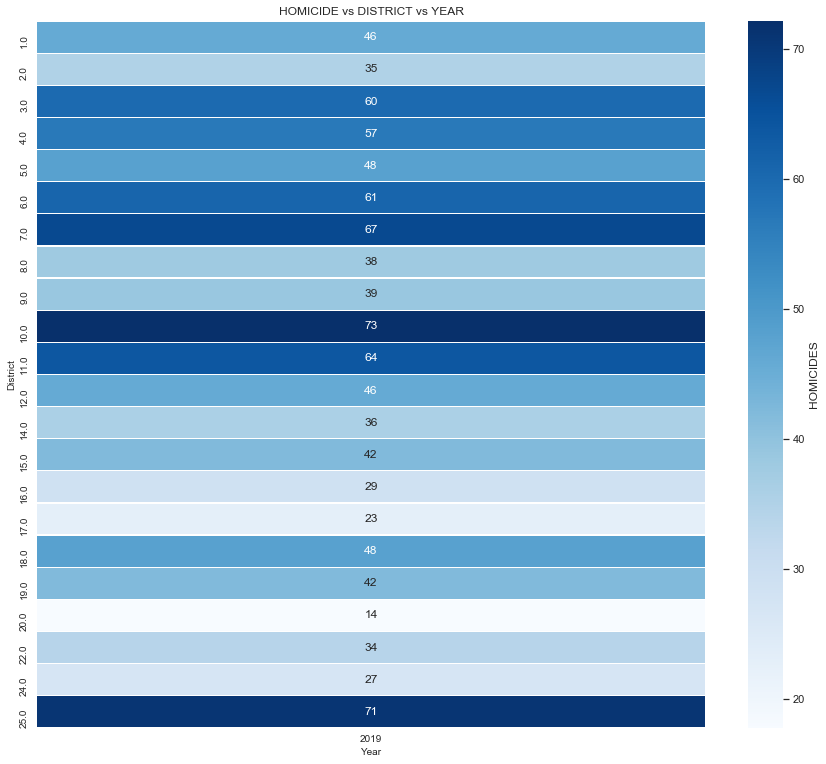

In [12]:
corr = df.groupby(['District','Year']).count().Date.unstack()
fig, ax = plt.subplots(figsize=(15,13))
sns.set(font_scale=1.0)
sns.heatmap(corr.dropna(axis=1),
            annot=True,
           linewidths=0.2,
           cmap='Blues',
            robust=True,
           cbar_kws={'label': 'HOMICIDES'})
plt.title('HOMICIDE vs DISTRICT vs YEAR')

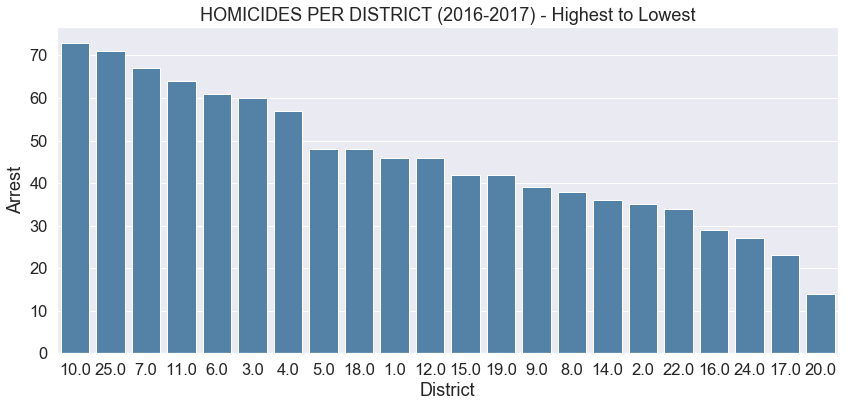

In [13]:
with sns.plotting_context('notebook',font_scale=1.5):
    sorted_homicides = df[df['Year']>=2016].groupby(['District']).count()\
                    .Arrest.reset_index().sort_values('Arrest',ascending=False)
    fig, ax = plt.subplots(figsize=(14,6))
    sns.barplot(x='District',
                y='Arrest',
                data=sorted_homicides,
                color='steelblue',
                order = list(sorted_homicides['District']),
                label='big')
    plt.title('HOMICIDES PER DISTRICT (2016-2017) - Highest to Lowest')

Text(0.5,1,'HOMICIDE - ARRESTS STATS BY YEAR')

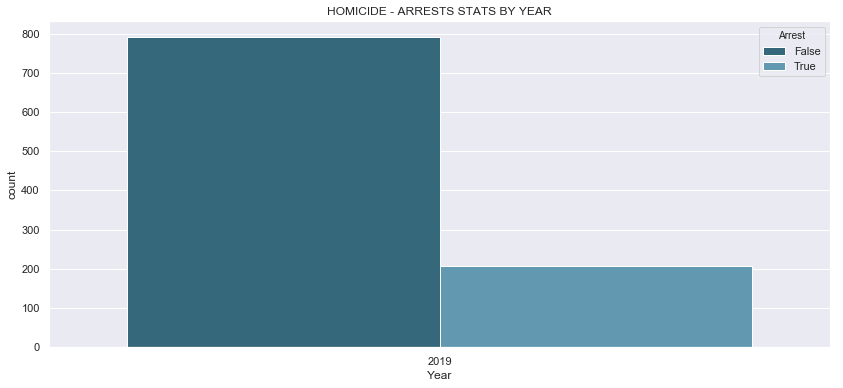

In [14]:
fig, ax = plt.subplots(figsize=(14,6))
df2 = df[['Year','Arrest']]
ax = sns.countplot(x="Year",
                   hue='Arrest',
                   data=df,
                   palette="PuBuGn_d")
plt.title('HOMICIDE - ARRESTS STATS BY YEAR')

Text(0.5,1,'HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

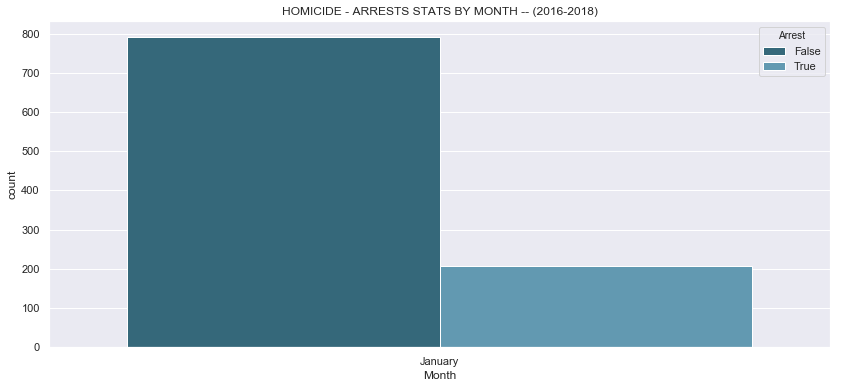

In [15]:
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.countplot(x="Month",
                   hue='Arrest',
                   data=df[df['Year']>=2016][['Month','Arrest']],
                   palette="PuBuGn_d")
month_nms = ['January','February','March','April','May','June','July',\
             'August','September','October','November','December']    
ax.set_xticklabels(month_nms)
plt.title('HOMICIDE - ARRESTS STATS BY MONTH -- (2016-2018)')

In [17]:
# plot chloropleth maps 2001 - 2017
def toString(x):
    return str(int(x))
df_homicide_allyears = df.groupby(['District']).count().Arrest.reset_index()
df_homicide_allyears['District'] = df_homicide_allyears['District'].apply(toString)
# ______________________________________________________#
chicago = location=[41.85, -87.68]
m = folium.Map(chicago,
               zoom_start=10)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='points1.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Choropleth of Homicide per Police District : 2001-2017',
    highlight=True
    )
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map1.html") 
IFrame('map1.html', width=990, height=700)

/anaconda3/envs/TEST/lib/python2.7/site-packages/folium/folium.py:426: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [21]:
# plot heatmap all districts -- (2016-2018)
after_2015_geo = []
for index, row in df[df['Year']>=2016][['Latitude','Longitude','District']].dropna().iterrows():
    after_2015_geo.append([row["Latitude"], row["Longitude"],row['District']])
# ___________________________________________________________________
chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)
plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
m.choropleth(
    geo_data='points1.geojson',
    name='choropleth',
    data=df,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='HeatMap Homicides : 2016-2017',
    highlight=True
    )
m.add_child(plugins.HeatMap(after_2015_geo,
                            name='all_homicides_2016_to_2017',
                            radius=5,
                            max_zoom=1,
                            blur=10, 
                            max_val=3.0))
folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map3.html") 
IFrame('map3.html', width=990, height=700)

/anaconda3/envs/TEST/lib/python2.7/site-packages/numpy/lib/histograms.py:778: RuntimeWarning: Converting input from bool to <type 'numpy.uint8'> for compatibility.
  a, weights = _ravel_and_check_weights(a, weights)


In [22]:
# plot yearly time lapse heatmap all districts -- (2001-2017)

chicago = location=[41.85, -87.68]
m = folium.Map(chicago, zoom_start=9.5,control_scale = False)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)
   
m.choropleth(
    geo_data='points1.geojson',
    name='choropleth',
    data=df_homicide_allyears,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.2, 
    line_opacity=0.2,
    legend_name='Homicides : 2001-2017',
    highlight=True
    )

heat_df = df[df['Year']>=2001].reset_index()
heat_df = heat_df[['Latitude', 'Longitude','Year']]
heat_df['Weight'] = heat_df['Year'].astype(float)
heat_df = heat_df.dropna(axis=0, subset=['Latitude','Longitude', 'Weight'])
heat_data = [[[row['Latitude'],row['Longitude']] for index, row in\
            heat_df[heat_df.Weight == i].iterrows()] for i in range(2001,2018)]

m.add_child(plugins.HeatMapWithTime(data=heat_data,
                                   auto_play=True,
                                   max_opacity=0.8,
                                   display_index=True,
                                   radius=9,
                                   name='HeatMapWithTime')
           )

folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map4.html") 
IFrame('map4.html', width=990, height=700)

In [23]:
# geo locations of homicides crime scenes -- 2016-2017

df_homicide_after_2015 = df[df['Year']>=2016].groupby(['District']).count().Arrest.reset_index()
df_homicide_after_2015['District'] = df_homicide_after_2015['District'].apply(toString)

after_2015 = df[df['Year']>=2016].dropna()

# _____________________________________________

lats = list(after_2015.Latitude)
longs = list(after_2015.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='points1.geojson',
    name='choropleth',
    data=df_homicide_after_2015,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : 2016-2017',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map5.html") 
IFrame('map5.html', width=990, height=700)

In [25]:
# geo locations of homicides -- January, February 2018

df_homicide_2018 = df[df['Year']==2018].groupby(['District']).count().Arrest.reset_index()
df_homicide_2018['District'] = df_homicide_2018['District'].apply(toString)

only_2018 = df[df['Year']==2018].dropna()

# _____________________________________________

lats = list(only_2018.Latitude)
longs = list(only_2018.Longitude)
locations = [lats,longs]

m = folium.Map(
    location=[np.mean(lats), np.mean(longs)],
    zoom_start=10.3
)

plugins.Fullscreen(
    position='topright',
    title='Expand me',
    title_cancel='Exit me',
    force_separate_button=True).add_to(m)

FastMarkerCluster(data=list(zip(lats, longs))).add_to(m)

m.choropleth(
    geo_data='points1.geojson',
    name='choropleth',
    data=df_homicide_2018,
    columns=['District', 'Arrest'],
    key_on='feature.properties.dist_num',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Homicides : January, February 2018',
    highlight=False
    )

# folium.TileLayer('openstreetmap').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.LayerControl().add_to(m)
m.save("map6.html") 
IFrame('map6.html', width=990, height=700)

/anaconda3/envs/TEST/lib/python2.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/envs/TEST/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: Location values cannot contain NaNs, got [nan, nan]